In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
epl = pd.read_csv("epl.csv")
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,FW,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,FW,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,58500000,45000000,FW,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,8250000,6750000,FW,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,13200000,9900000,DF,20,...,7,23,2,1,29,0,0,42,25,18


In [3]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 40 columns):
Player                   1468 non-null object
Season                   1468 non-null object
Born                     1468 non-null int64
Age                      1468 non-null int64
Squad                    1468 non-null object
Nation                   1468 non-null object
Previous Market Value    1468 non-null int64
Market Value             1468 non-null int64
Position                 1468 non-null object
App                      1468 non-null int64
Minutes                  1468 non-null int64
Goals                    1468 non-null int64
Passes                   1468 non-null int64
Assists                  1468 non-null int64
Yellow                   1468 non-null int64
Red                      1468 non-null int64
SubOn                    1468 non-null int64
SubOff                   1468 non-null int64
Shots                    1468 non-null int64
SOT                      1468 non

In [5]:
epl['Position'].value_counts()

MF    575
DF    527
FW    366
Name: Position, dtype: int64

In [4]:
cleanup_position={"Position":{"MF":1,"DF":2,"FW":3},"Season":{"2015-2016":1,"2016-2017":2,"2017-2018":3,"2018-2019":4}}

In [5]:
epl.replace(cleanup_position,inplace=True)
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,1,1987,27,Swansea City,Portugal,5500000,4500000,3,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,3,1992,25,Chelsea,Spain,44000000,58500000,3,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,4,1992,25,Chelsea,Spain,58500000,45000000,3,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2,1985,30,Middlesbrough,Spain,8250000,6750000,3,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,4,1989,28,West Ham United,England,13200000,9900000,2,20,...,7,23,2,1,29,0,0,42,25,18


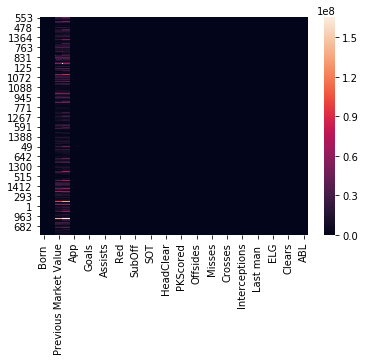

In [13]:
sns.heatmap(epl.drop(['Player', 'Season','Nation','Squad','Position'], axis = 1))

Now I am going to break into Defenders, Midfielders, Forwards

In [14]:
epl.sort_values(by='Position', axis=0, inplace=True)
# set the index to be this and don't drop
# get a list of names
names=epl['Position'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe
Fwd = epl.loc[epl.Position==3]